In [37]:
# 0 not infected
# 1 infected: incubation
# 2 infected: incubation
# 3 infected: spreading
# 4 infected: spreading
# 5 immune

In [44]:
import sys
import numpy as np
import random
import math

stage1_prop = 0.3
stage2_prop = 0.2
cluster_nbrs_path = 'cluster_nbrs_e6_sigma_0.125.clust'
grid_nbrs_path = 'grid_nbrs_e6_sigma_0.125.clust'
b_cluster_nbrs_path = 'b_cluster_nbrs_e6_sigma_0.125.clust'


# read cluster files
print('read cluster files')
node_states = {}
cluster_nbrs = {}
with open(cluster_nbrs_path) as f:
    for line in f:
        node, nbrs = line.split(':')
        node = int(node)
        nbrs = set(map(int, nbrs.split()))
        cluster_nbrs[node] = nbrs
        node_states[node] = 0

grid_nbrs = {}
with open(grid_nbrs_path) as f:
    for line in f:
        node, nbrs = line.split(':')
        node = int(node)
        nbrs = set(map(int, nbrs.split()))
        grid_nbrs[node] = nbrs

b_cluster_nbrs = {}
with open(b_cluster_nbrs_path) as f:
    for line in f:
        node, nbrs = line.split(':')
        node = int(node)
        nbrs = set(map(int, nbrs.split()))
        b_cluster_nbrs[node] = nbrs


read cluster files


In [45]:
# sim stages
def spread_1(spreading_nodes, prop):
    for spreading_node in spreading_nodes:
        for nbr in cluster_nbrs[spreading_node]:
            if node_states[nbr] == 0:
                if random.random() < prop:
                    node_states[nbr] = 1


def spread_2(spreading_nodes, prop):
    for spreading_node in spreading_nodes:
        if spreading_node in grid_nbrs:
            for nbr in grid_nbrs[spreading_node]:
                if node_states[nbr] == 0:
                    if random.random() < prop:
                        node_states[nbr] = 1
        if spreading_node in b_cluster_nbrs:
            for nbr in b_cluster_nbrs[spreading_node]:
                if node_states[nbr] == 0:
                    if random.random() < prop:
                        node_states[nbr] = 1


In [46]:
def run_sim(sim_iter, stage1_prop, stage2_prop):
    num_start = int(2*math.log(len(node_states)))
    start_nodes = random.sample(node_states.keys(), num_start)
    for v in node_states:
        node_states[v] = 0
    for v in start_nodes:
        node_states[v] = 1
    
    print('n: {}'.format(len(node_states)))
    print('start nodes: {}'.format(len(start_nodes)))
    print('iterations: {}'.format(sim_iter))
    print('prop: {} {}'.format(stage1_prop, stage2_prop))
    x = []
    y = []

    for i in range(sim_iter):
        inf_nodes = []
        spreading_nodes = []
        for v in node_states.keys():
            if node_states[v] >= 1 and node_states[v] <= 4:
                inf_nodes.append(v)
                if node_states[v] >= 3 and node_states[v] <= 4:
                    spreading_nodes.append(v)
        
        spread_1(spreading_nodes, stage1_prop)
        spread_2(spreading_nodes, stage2_prop)
        
        for inf_node in inf_nodes:
            node_states[inf_node] += 1
        
        num_inf = sum([1 for v in node_states.keys() if node_states[v] > 0])
        x.append(i)
        y.append(num_inf)
        print(i, end='\r')
        
    print('infected nodes: {}'.format(num_inf))
    return x,y

In [36]:
results_5 = {}
for i in [0.2, 0.1, 0.08, 0.06]:
    x,y = run_sim(200, 0.3, i)
    results_5[i] = (x, y)

n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.2
infected nodes: 1969485
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.1
infected nodes: 1424191
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.08
infected nodes: 1099028
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.06
infected nodes: 171228


In [41]:
results_25 = {}
for i in [0.2, 0.1, 0.08, 0.06]:
    x,y = run_sim(200, 0.3, i)
    results_25[i] = (x, y)

n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.2
infected nodes: 1887625
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.1
infected nodes: 1306137
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.08
infected nodes: 980785
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.06
infected nodes: 63837


In [47]:
results_125 = {}
for i in [0.2, 0.1, 0.08, 0.06]:
    x,y = run_sim(200, 0.3, i)
    results_125[i] = (x, y)

n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.2
infected nodes: 1843333
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.1
infected nodes: 1242088
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.08
infected nodes: 904675
n: 2386310
start nodes: 29
iterations: 200
prop: 0.3 0.06
infected nodes: 85903


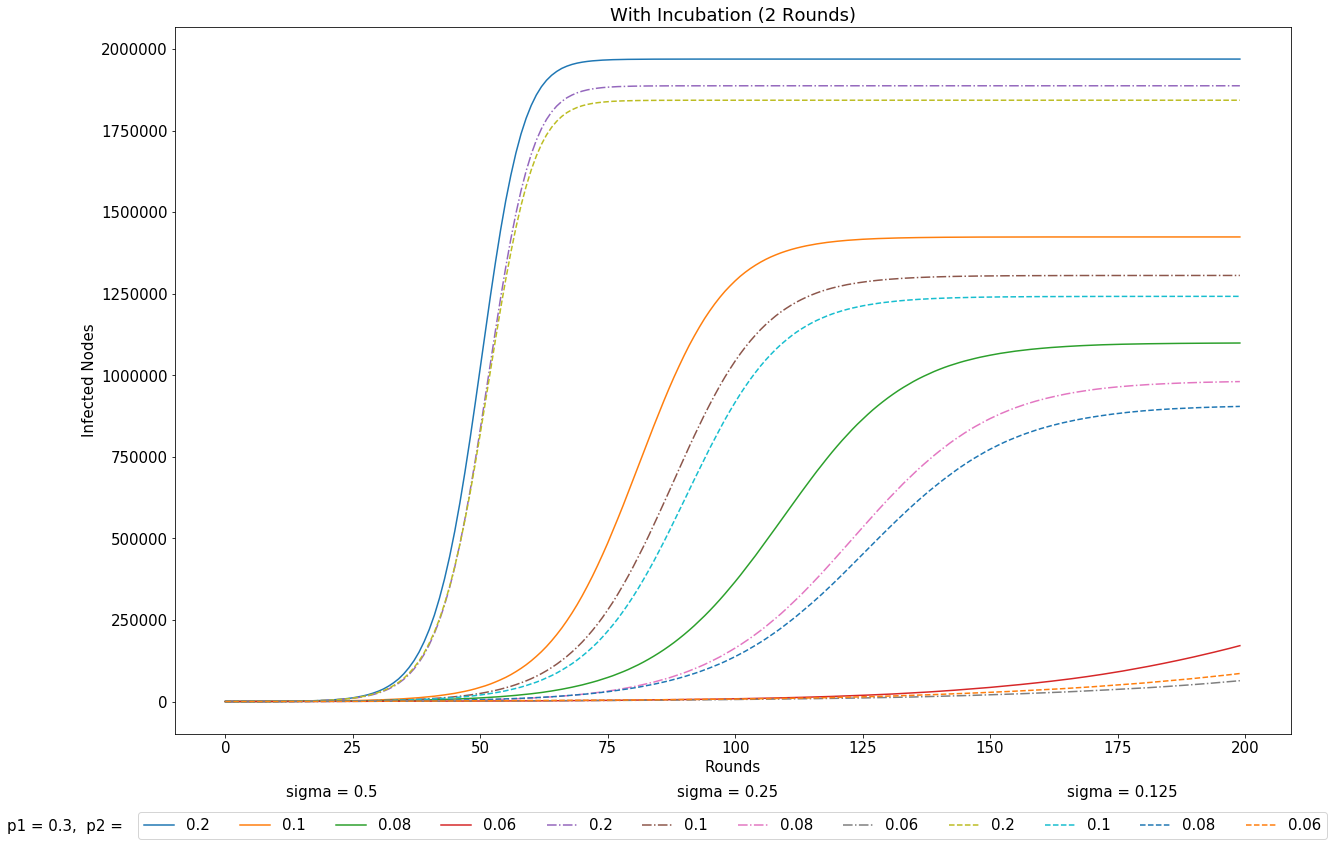

In [65]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

fig, axs = plt.subplots(figsize=(20,13))
for i in results_5.keys():
    axs.plot(results_5[i][0], results_5[i][1], label=i)
for i in results_25.keys():
    axs.plot(results_25[i][0], results_25[i][1], label=i, linestyle='dashdot')
for i in results_125.keys():
    axs.plot(results_125[i][0], results_125[i][1], label=i, linestyle='dashed')
axs.set_title('With Incubation (2 Rounds)')
axs.set_xlabel('Rounds')
axs.set_ylabel('Infected Nodes')
axs.text(-0.15, -0.138, 'p1 = 0.3,  p2 =', transform=axs.transAxes)
axs.text(0.1, -0.09, 'sigma = 0.5', transform=axs.transAxes)
axs.text(0.45, -0.09, 'sigma = 0.25', transform=axs.transAxes)
axs.text(0.8, -0.09, 'sigma = 0.125', transform=axs.transAxes)
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=16)
